In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animatio
from include import main

n = 200
t = 2
L = 10
delt = 0.01

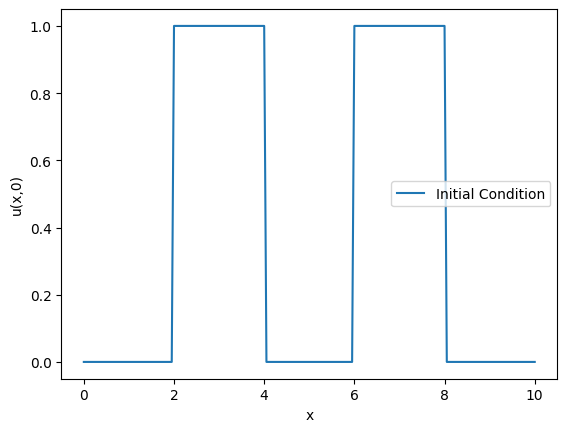

In [3]:
# Initialization:
burg = main.Burgers(n, t, L, delt)
burg.initialization()
burg.burgPlot()

In [5]:
u_final = burg.solver()


In [6]:
burg.animation(u_final,False)


<Figure size 1000x600 with 0 Axes>

e:\1 M.Sc Comp Engg\github\burgers_jax\.venv\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


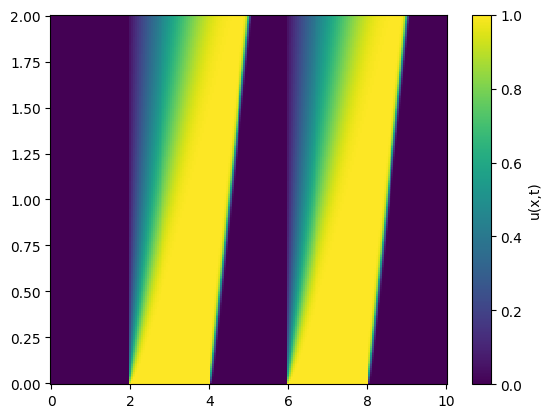

In [7]:
burg.chart(u_final)